# Assignment - Global CO2 emissions
For this assignment you're going to make several graphs based on a single dataset.

The dataset we're using will be the first table of this Wikipedia page on carbon dioxide emissions .

Reading in the table as-is will produce a "MultiIndex" dataframe. By renaming all columns you can convert it into a non-MultiIndex dataframe.



In [63]:
import pandas as pd
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
CO2_emissions = tables[1]

# Rename columns
CO2_emissions.columns = ['Country', '1990', '2005','2017', '2017world%', '20171990%', '2017opp', '2017inwoner', '2018LUCFincl', '2018LUCFexcl']

CO2_emissions


,Country,1990,2005,2017,2017world%,20171990%,2017opp,2017inwoner,2018LUCFincl,2018LUCFexcl
0,World,22674.116,30049.809,37077.404,100.00%,63.5%,73.0,4.9,36431.11,35247.21
1,World – International Aviation,258.941,422.777,543.381,1.47%,109.8%,NaN,NaN,NaN,NaN
2,World – International Shipping,371.804,572.169,677.248,1.83%,82.2%,NaN,NaN,NaN,NaN
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


### Use slicing and/or boolean masks to filter out the rows in this table that aren't countries.

p.s. Er is uitgegaan van:

*   rijen die bij 2018LUCFincl geen waarde hebben zijn geen land.
*   (East Timor, Taiwan en Western Sahara zijn dus ook geen land)
*   World , European Union zijn geen land
*   Cook Island is geen land (zie vorige opdracht Winc)

In [64]:
# mask maken voor de alles wat je niet in je country kolom wilt hebben staan

searchfor = ['Anguilla', 'Aruba', 'Bermuda', 'British Virgin', 'Cayman', 'Cook',
           'Curaçao', 'Falkland', 'Faroe', 'Gibraltar', 'Greenland', 
           'Guadeloupe', 'French Guiana', 'Hong Kong', 'Macau', 'Marti', 
           'New Cale', 'French Polynesia', 'Puerto Ri', 'Réunion', 
           'Saint Helena', 'Saint Pierre', 'Turks and', 'European Union', 'World', 'East Timor', 'Taiwan', 'Western Sahara']
no_countries_mask = CO2_emissions.Country.str.contains('|'.join(searchfor))
# CO2_emissions.loc[no_countries_mask]
# CO2_emissions.loc[~no_countries_mask]

Controleren of het aantal landen klopt wat eruit is

In [65]:
# De landen die we eruit willen halen:
CO2_emissions.loc[no_countries_mask].shape
# (30, 10)

# controleren of er inderdaad 23 landen uit zijn

# oorspronkelijke database
# CO2_emissions.shape
# (212, 10)

# Database na toepassen [~no_countries_mask]
# CO2_emissions.loc[~no_countries_mask].shape
# (182, 10)


(30, 10)

Nu alles klopt, de oorspronkelijke database aanpassen aan de no_countries_mask

In [66]:
CO2_emissions = CO2_emissions.loc[~no_countries_mask]
CO2_emissions

,Country,1990,2005,2017,2017world%,20171990%,2017opp,2017inwoner,2018LUCFincl,2018LUCFexcl
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
8,Antigua and Barbuda,0.223,0.283,0.624,0.00%,179.8%,1412.0,6.1,0.53,0.53
...,...,...,...,...,...,...,...,...,...,...
206,Venezuela,109.268,152.464,145.877,0.39%,33.5%,159.0,4.6,181.29,138.16
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


# Graph 1: CO2 of the bigger countries
Make a graph of the CO2 emissions of the 5 biggest CO2 producers in the world (based on the latest measurement). The x-axis should be the years of 1990, 2005 and 2017. If newer datapoints are added in the future please include them as well. The y-axis should represent the fossil CO2 emissions in Mt CO2 for the given years.

In [67]:
# Kolommen selecteren die je nodig hebt
# En tegelijkertijd met slicing of head de eerste 5 rijen selecteren
CO2_emissions = CO2_emissions.loc[:, ['Country','1990', '2005', '2017']]   

CO2_em_5_biggest = CO2_emissions.sort_values("2017", ascending=False)[:5] 
CO2_em_5_biggest

# andere optie:
# CO2_em_5_biggest = CO2_emissions.sort_values("2017", ascending=False).head(5) 
# CO2_em_5_biggest



,Country,1990,2005,2017
42,China,2397.048,6263.064,10877.218
202,United States,5085.897,5971.571,5107.393
93,India,605.968,1210.754,2454.774
158,Russia,2378.921,1733.950,1764.866
102,Japan,1149.400,1276.863,1320.776


Nu een lijnplot maken van deze tabel


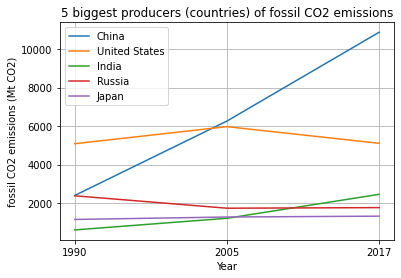

In [68]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# jaren uit dataframe halen
years = CO2_em_5_biggest.columns[1:]

for index, row in CO2_em_5_biggest.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("5 biggest producers (countries) of fossil CO2 emissions")
plt.xlabel("Year")
plt.ylabel("fossil CO2 emissions (Mt CO2)")
plt.legend()
plt.grid()

plt.show()



# Graph 2: worst and best changers
Because of climate change it's important that we curb our carbon dioxide emissions. So some countries will have lowered their emissions while others may have increased their emissions. Some countries will have better results in doing this than others. If we calculate the relative change and sort by that change we'll get a list with countries that are changing for the better at one end and countries that are changing less well on the other end.

Find the top three and bottom three countries with regards to lowering these emissions and plot their results.

## Note

### If you want to add a new column to a dataframe you can do that like this:

### df['example'] = df.loc[:,'column_a'] + df.loc[:,'column_b']
## Note

### If you need to sort a dataframe by a column use sort_values

The x-axis should have be the years of 1990, 2005 and 2017. If newer datapoints are added in the future please include them as well. The y-axis should represent the relative amount of CO2 emitted where the measurement in 1990 is 100%.

An example: Afghanistan emitted 2546Mt of CO2 in 1990 (which is the 100%). The relative amount in 2005 would be 1063/2546 * 100 = 41.75%. The relative amount in 2017 would be 11.422/2546 * 100 = 448.62%. So if Afghanistan is on the chart the line would go down first and then back up again.


In [69]:
# Ik werk verder met CO2_emissions. 
# Deze database bevat alle kolommen die we nodig hebben
# en ook nog alle rijen

CO2_emissions['1990_set_to_100'] = 100
CO2_emissions['relative_change_2005_tov_1990'] = (CO2_emissions.loc[:,'2005'] / CO2_emissions.loc[:,'1990']) * 100
CO2_emissions['relative_change_2017_tov_1990'] = (CO2_emissions.loc[:,'2017'] / CO2_emissions.loc[:,'1990']) * 100
# CO2_emissions

# sorteren op kolom "relative_change_2017_tov_1990"
CO2_emissions_2 = CO2_emissions.sort_values("relative_change_2017_tov_1990")
CO2_emissions_2


,Country,1990,2005,2017,1990_set_to_100,relative_change_2005_tov_1990,relative_change_2017_tov_1990
10,Armenia,20.699,4.542,4.832,100,21.943089,23.344123
128,Moldova,31.957,8.139,8.263,100,25.468598,25.856620
199,Ukraine,783.210,354.429,205.723,100,45.253380,26.266646
141,North Korea,131.365,79.568,37.774,100,60.570167,28.754996
76,Georgia,34.745,4.979,11.558,100,14.330119,33.265218
...,...,...,...,...,...,...,...
121,Maldives,0.065,0.479,0.964,100,736.923077,1483.076923
22,Benin,0.415,2.839,7.097,100,684.096386,1710.120482
37,Cape Verde,0.049,0.227,0.955,100,463.265306,1948.979592
62,Equatorial Guinea,0.097,3.371,2.469,100,3475.257732,2545.360825


In [70]:
# Nu alle kolommen eruit halen die niet nodig zijn voor de plot

CO2_emissions_2_1 = CO2_emissions_2.loc[:, ['Country','1990_set_to_100', 'relative_change_2005_tov_1990', 'relative_change_2017_tov_1990']]
CO2_emissions_2_1

,Country,1990_set_to_100,relative_change_2005_tov_1990,relative_change_2017_tov_1990
10,Armenia,100,21.943089,23.344123
128,Moldova,100,25.468598,25.856620
199,Ukraine,100,45.253380,26.266646
141,North Korea,100,60.570167,28.754996
76,Georgia,100,14.330119,33.265218
...,...,...,...,...
121,Maldives,100,736.923077,1483.076923
22,Benin,100,684.096386,1710.120482
37,Cape Verde,100,463.265306,1948.979592
62,Equatorial Guinea,100,3475.257732,2545.360825


In [71]:
# Hernoem eerst de kolommen (nodig voor mooie grafiek)

CO2_emissions_2_1.columns = ["Country", "1990", "2005", "2017"]
CO2_emissions_2_1

,Country,1990,2005,2017
10,Armenia,100,21.943089,23.344123
128,Moldova,100,25.468598,25.856620
199,Ukraine,100,45.253380,26.266646
141,North Korea,100,60.570167,28.754996
76,Georgia,100,14.330119,33.265218
...,...,...,...,...
121,Maldives,100,736.923077,1483.076923
22,Benin,100,684.096386,1710.120482
37,Cape Verde,100,463.265306,1948.979592
62,Equatorial Guinea,100,3475.257732,2545.360825


In [72]:
# Selecteer de onderste en de bovenste drie rijen:
# Ik wil dus eigenlijk rijen 10, 128, 199, 37 62, en 34 in de grafiek hebben

CO2_emissions_2_2 = CO2_emissions_2_1.head(3).append(CO2_emissions_2_1.tail(3))
CO2_emissions_2_2




,Country,1990,2005,2017
10,Armenia,100,21.943089,23.344123
128,Moldova,100,25.468598,25.856620
199,Ukraine,100,45.253380,26.266646
37,Cape Verde,100,463.265306,1948.979592
62,Equatorial Guinea,100,3475.257732,2545.360825
34,Cambodia,100,659.950860,2594.594595


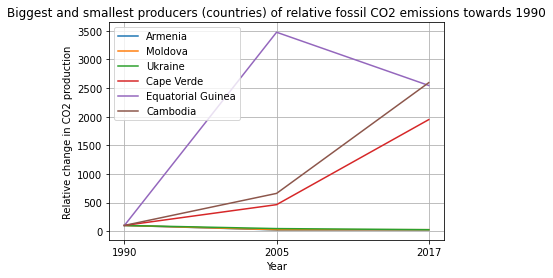

In [73]:
# maak nu een grafiek van dit dataframe

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# jaren uit dataframe halen
years = CO2_emissions_2_2.columns[1:]

for index, row in CO2_emissions_2_2.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("Biggest and smallest producers (countries) of relative fossil CO2 emissions towards 1990")
plt.xlabel("Year")
plt.ylabel("Relative change in CO2 production")
plt.legend()
plt.grid()

plt.show()


# Derde grafiek

You may get some really small countries if you look at the relative change. This can distort the chart a lot. To create a more useful chart: now create the same chart for all countries that had at least five Mt of CO2 emissions in 1990.

In [74]:
# hiervoor weer terug naar een vorig dataframe "CO2_emissions_2"
# Deze is al gesorteerd op kolom "relative_change_2017_tov_1990"
CO2_emissions_2

,Country,1990,2005,2017,1990_set_to_100,relative_change_2005_tov_1990,relative_change_2017_tov_1990
10,Armenia,20.699,4.542,4.832,100,21.943089,23.344123
128,Moldova,31.957,8.139,8.263,100,25.468598,25.856620
199,Ukraine,783.210,354.429,205.723,100,45.253380,26.266646
141,North Korea,131.365,79.568,37.774,100,60.570167,28.754996
76,Georgia,34.745,4.979,11.558,100,14.330119,33.265218
...,...,...,...,...,...,...,...
121,Maldives,0.065,0.479,0.964,100,736.923077,1483.076923
22,Benin,0.415,2.839,7.097,100,684.096386,1710.120482
37,Cape Verde,0.049,0.227,0.955,100,463.265306,1948.979592
62,Equatorial Guinea,0.097,3.371,2.469,100,3475.257732,2545.360825


In [75]:
# Nu een mask maken waarbij kolom "1990" >= 5

CO2_emissions_3 = CO2_emissions_2.loc[CO2_emissions_2["1990"] >= 5]
CO2_emissions_3

,Country,1990,2005,2017,1990_set_to_100,relative_change_2005_tov_1990,relative_change_2017_tov_1990
10,Armenia,20.699,4.542,4.832,100,21.943089,23.344123
128,Moldova,31.957,8.139,8.263,100,25.468598,25.856620
199,Ukraine,783.210,354.429,205.723,100,45.253380,26.266646
141,North Korea,131.365,79.568,37.774,100,60.570167,28.754996
76,Georgia,34.745,4.979,11.558,100,14.330119,33.265218
...,...,...,...,...,...,...,...
6,Angola,5.851,15.975,30.876,100,273.030251,527.704666
155,Qatar,16.291,43.435,97.787,100,266.619606,600.251673
17,Bangladesh,13.868,38.834,84.546,100,280.025959,609.648111
144,Oman,11.884,32.964,78.421,100,277.381353,659.887243


In [76]:
# verwijder kolommen die je niet nodig hebt
CO2_emissions_3_1 = CO2_emissions_3.loc[:, ['Country','1990_set_to_100', 'relative_change_2005_tov_1990', 'relative_change_2017_tov_1990']]
CO2_emissions_3_1
  


,Country,1990_set_to_100,relative_change_2005_tov_1990,relative_change_2017_tov_1990
10,Armenia,100,21.943089,23.344123
128,Moldova,100,25.468598,25.856620
199,Ukraine,100,45.253380,26.266646
141,North Korea,100,60.570167,28.754996
76,Georgia,100,14.330119,33.265218
...,...,...,...,...
6,Angola,100,273.030251,527.704666
155,Qatar,100,266.619606,600.251673
17,Bangladesh,100,280.025959,609.648111
144,Oman,100,277.381353,659.887243


In [77]:
# Hernoem de kolommen

CO2_emissions_3_1.columns = ['Country','1990', '2005', '2017']
CO2_emissions_3_1


,Country,1990,2005,2017
10,Armenia,100,21.943089,23.344123
128,Moldova,100,25.468598,25.856620
199,Ukraine,100,45.253380,26.266646
141,North Korea,100,60.570167,28.754996
76,Georgia,100,14.330119,33.265218
...,...,...,...,...
6,Angola,100,273.030251,527.704666
155,Qatar,100,266.619606,600.251673
17,Bangladesh,100,280.025959,609.648111
144,Oman,100,277.381353,659.887243


In [78]:
# We willen de drie grootste en de drie kleinste hebben
# We willen de rijen 10, 128, 199, 17, 144 en 207 hebben

CO2_emissions_3_2 = CO2_emissions_3_1.head(3).append(CO2_emissions_3_1.tail(3))
CO2_emissions_3_2

,Country,1990,2005,2017
10,Armenia,100,21.943089,23.344123
128,Moldova,100,25.468598,25.856620
199,Ukraine,100,45.253380,26.266646
17,Bangladesh,100,280.025959,609.648111
144,Oman,100,277.381353,659.887243
207,Vietnam,100,491.680706,1083.782579


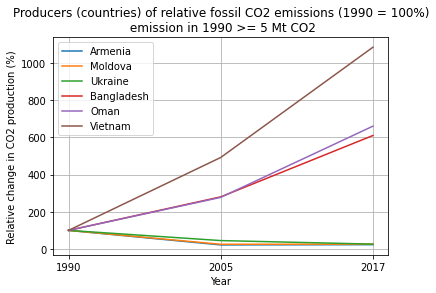

In [79]:
# Nu grafiek maken

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# jaren uit dataframe halen
years = CO2_emissions_3_2.columns[1:]

for index, row in CO2_emissions_3_2.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("Producers (countries) of relative fossil CO2 emissions (1990 = 100%)\n emission in 1990 >= 5 Mt CO2")
plt.xlabel("Year")
plt.ylabel("Relative change in CO2 production (%)")
plt.legend()
plt.grid()

plt.show()


### Pas op! Bij bovenstaande derde grafiek is de voorwaarde dat de totale uitstoot van CO2 in 1990 boven de 5 Mt moet liggen. Leg je de lat ergens anders, dan krijg je ook een totaal andere grafiek.

Het is maar waar je de nadruk op wilt leggen